In [1]:
import numpy as np
x = np.array([[1., 2., 3.], [4., 5., 6.]])
y = np.array([[6., 23.], [-1, 7], [8, 9]])
x.dot(y)
np.dot(x, np.ones(3))
#The @ symbol also works as an infix operator that performs matrix multiplication
x @ np.ones(3)

array([ 6., 15.])

In [2]:
x = np.random.choice([False, True], size=10)
print(x)
print(x[:-1])
print(x[1:])

[False False  True  True  True False  True  True  True False]
[False False  True  True  True False  True  True  True]
[False  True  True  True False  True  True  True False]


In [3]:
"""
numpy.linalg has a standard set of matrix decompositions and things like inverse and determinant
"""
from numpy.linalg import inv, qr
X = np.random.randn(5, 5)
mat = X.T.dot(X)
inv(mat)
mat.dot(inv(mat))
q, r = qr(mat)
r

array([[-10.88849884,  -5.30252244,   8.42676411,   5.29048133,
          6.20389141],
       [  0.        ,  -5.25611278,   2.87182429,  -2.71606097,
          3.75178741],
       [  0.        ,   0.        ,  -3.62637319,   0.08726536,
         -5.58151909],
       [  0.        ,   0.        ,   0.        ,  -2.75820829,
         -0.88318555],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.3549946 ]])

In [4]:
"""
The numpy.random module supplements the built-in Python random with functions 
for efficiently generating whole arrays of sample values from many kinds of probability distributions. 
For example, you can get a 4 × 4 array of samples from the standard normal distribution using normal
"""
samples = np.random.normal(size=(4, 4))
"""
Python’s built-in random module, by contrast, only samples one value at a time. 
As you can see from this benchmark, numpy.random is well over an order of magnitude faster 
for generating very large samples
"""
#from random import normalvariate
#N = 1000000
#%timeit samples = [normalvariate(0, 1) for _ in range(N)]
#%timeit np.random.normal(size=N)
"""
You can change NumPy’s random number generation seed using np.random.seed
The data generation functions in numpy.random use a global random seed. 
To avoid global state, you can use numpy.random.RandomState to create 
a random number generator isolated from others
"""
rng = np.random.RandomState(1234)
rng.randn(10)

array([ 0.47143516, -1.19097569,  1.43270697, -0.3126519 , -0.72058873,
        0.88716294,  0.85958841, -0.6365235 ,  0.01569637, -2.24268495])

In [5]:
"""
random walk
"""
import random
import matplotlib.pyplot as plt
position = 0
walk = [position]
steps = 1000
for i in range(steps):
    step = 1 if random.randint(0, 1) else -1
    position += step
    walk.append(position)
plt.plot(walk[:100])
plt.show()

<Figure size 640x480 with 1 Axes>

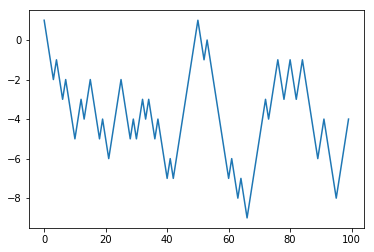

9

In [6]:
"""
walk is simply the cumulative sum of the random steps and could be evaluated as an array expression. 
Thus, I use the np.random module to draw 1,000 coin flips at once, set these to 1 and –1, and compute the cumulative sum
"""
nsteps = 1000
draws = np.random.randint(0, 2, size=nsteps)
steps = np.where(draws > 0, 1, -1)
walk = steps.cumsum()
plt.plot(walk[:100])
plt.show()
walk.min()
walk.max()

In [7]:
"""
A more complicated statistic is the first crossing time, the step at which the random walk 
reaches a particular value. Here we might want to know how long it took the random walk 
to get at least 10 steps away from the origin 0 in either direction. 
np.abs(walk) >= 10 gives us a boolean array indicating where the walk has reached or exceeded 10, 
but we want the index of the first 10 or –10. Turns out, we can compute this using argmax, 
which returns the first index of the maximum value in the boolean array (True is the maximum value)
"""
print(np.abs(walk))
(np.abs(walk) >= 10).argmax()

[ 1  0  1  2  1  2  3  2  3  4  5  4  3  4  3  2  3  4  5  4  5  6  5  4
  3  2  3  4  5  4  5  4  3  4  3  4  5  4  5  6  7  6  7  6  5  4  3  2
  1  0  1  0  1  0  1  2  3  4  5  6  7  6  7  8  7  8  9  8  7  6  5  4
  3  4  3  2  1  2  3  2  1  2  3  2  1  2  3  4  5  6  5  4  5  6  7  8
  7  6  5  4  3  4  3  4  5  4  5  4  3  4  5  6  5  4  3  4  5  4  5  6
  7  6  5  4  3  2  3  2  1  0  1  0  1  2  1  2  3  4  3  2  3  4  3  4
  5  4  3  4  5  6  7  6  5  4  3  4  3  2  1  0  1  2  1  0  1  0  1  2
  1  2  1  2  3  2  3  4  5  6  7  8  9  8  7  6  5  6  5  6  5  4  5  4
  5  4  3  2  3  4  3  2  3  4  3  2  1  0  1  2  1  0  1  0  1  0  1  2
  1  2  3  2  1  0  1  2  3  4  3  2  1  0  1  2  1  0  1  2  3  4  3  2
  3  2  1  0  1  2  1  0  1  0  1  0  1  0  1  2  1  0  1  2  1  2  3  4
  5  4  5  6  5  4  5  6  5  6  5  4  3  4  3  4  3  2  1  2  1  0  1  0
  1  2  1  0  1  0  1  2  3  2  1  2  3  4  3  2  1  0  1  2  1  2  3  2
  3  2  1  0  1  0  1  2  1  2  1  2  1  0  1  2  1

373

In [8]:
"""
Simulating Many Random Walks at Once
"""
nwalks = 5000
nsteps = 1000
draws = np.random.randint(0, 2, size=(nwalks, nsteps)) # 2d of 0 or 1
#draws?
steps = np.where(draws > 0, 1, -1)
walks = steps.cumsum(1)
#walks?
hits30 = (np.abs(walks) >= 30).any(1)
hits30?
hits30.sum() # Number that hit 30 or -30
"""
We can use this boolean array to select out the rows of walks that actually cross the absolute 30 level and 
call argmax across axis 1 to get the crossing times
"""
crossing_times = (np.abs(walks[hits30]) >= 30).argmax(1)
crossing_times.mean()

502.303351475222